In [5]:
import pandas as pd 
dataset=pd.read_csv(r"C:\Users\wwrao\Downloads\overfitting_regression_dataset.csv")
dataset.head()

,noise_feature_0,noise_feature_1,noise_feature_2,noise_feature_3,noise_feature_4,main_feature,target
0,-14.153707,-4.206453,-3.427145,-8.022773,-1.612857,0.00000,56.671415
1,4.040509,18.861859,1.745778,2.575504,-0.744459,0.10101,-6.559059
2,-19.187712,-0.265139,0.602302,24.632421,-1.923610,0.20202,72.252890
3,3.015473,-0.347118,-11.686780,11.428228,7.519330,0.30303,159.983899
4,7.910319,-9.093875,14.027943,-14.018511,5.868571,0.40404,-15.526416


In [6]:
dataset.isnull().sum()

noise_feature_0    0
noise_feature_1    0
noise_feature_2    0
noise_feature_3    0
noise_feature_4    0
main_feature       0
target             0
dtype: int64

In [7]:
x=dataset.iloc[:,:6]
x.head(2)


,noise_feature_0,noise_feature_1,noise_feature_2,noise_feature_3,noise_feature_4,main_feature
0,-14.153707,-4.206453,-3.427145,-8.022773,-1.612857,0.00000
1,4.040509,18.861859,1.745778,2.575504,-0.744459,0.10101


In [8]:
y=dataset.iloc[:,-1]
y.head(2)

0    56.671415
1    -6.559059
Name: target, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 6), (20, 6), (80,), (20,))

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [11]:
lr.score(x_train,y_train)

0.8537590362197204

In [12]:
y_pred=lr.predict(x_test)
y_pred

array([  -54.26290471,  -284.97621938,   784.23578469,   675.73150494,
        2119.33233364,  -981.31621835,  2654.73237353,   592.19308663,
         657.4294125 ,  1906.86878689, -1077.60231928, -1177.4866379 ,
        1731.3998693 ,  1306.28292734,  3355.72414545,  2385.65409346,
        2886.37047945,   230.51545196,  1904.01638296,  1221.96384696])

In [13]:
y_test[:10]

19    -107.861210
14    -155.108571
43     324.161853
37      27.390739
66    1323.502692
3      159.983899
79    2118.128793
41     323.109238
38     109.521986
68    1495.338283
Name: target, dtype: float64

In [14]:
from sklearn.metrics import r2_score,accuracy_score
r2_score(y_test,y_pred)


0.6238778314188912

<h4>its clear seee that our model is over fitting because the training(85%)and testing(62)and reduce by applying the l2 regression or ridge regression </h4>

C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


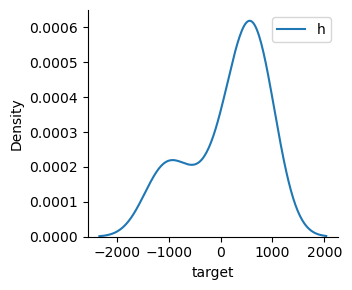

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.displot(y_pred-y_test,kind="kde",height=3,aspect=1.2,legend="high varience")
plt.legend("highvarience")

<h2>applying ridge regression </h2>

In [16]:
from sklearn.linear_model import Ridge,Lasso
r=Ridge(alpha=10)
l=Lasso()
r.fit(x_train,y_train)


Ridge(alpha=10)

In [17]:
r.score(x_train,y_train)


0.8535667564063807

In [18]:
y_pred1=r.predict(x_test)


In [19]:
r2_score(y_test,y_pred1)

0.6307203529339825

<h2>Lasso Regression </h2>

In [20]:
l = Lasso(alpha=1.0)  # Initialize the Lasso model
l.fit(x_train, y_train) 

Lasso()

In [21]:
l.score(x_train,y_train)


0.8537589235743543

In [22]:
y_pred2=l.predict(x_test)

In [23]:
r2_score(y_test,y_pred2)

0.624181100418076

C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


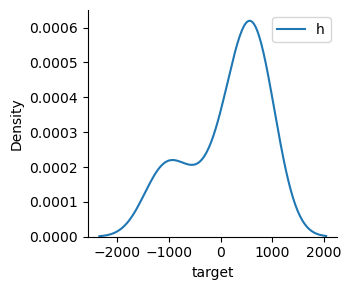

In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.displot(y_pred2-y_test,kind="kde",height=3,aspect=1.2,legend="high varience")
plt.legend("highvarience")